<a href="https://colab.research.google.com/github/Rushikesh3005/Mobile-price-range-prediction/blob/main/mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name:-Mobile price Range Prediction





#Problem Statement

###**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.**
###**The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**


#**Data Description -**


**Battery_power -** Total energy a battery can store in one time measured in mAh

**Blue -** Has bluetooth or not

**Clock_speed -** speed at which microprocessor executes instructions

**Dual_sim -** Has dual sim support or not

**Fc -** Front Camera mega pixels

**Four_g -** Has 4G or not

**Int_memory -** Internal Memory in Gigabytes

**M_dep -** Mobile Depth in cm

**Mobile_wt -** Weight of mobile phone

**N_cores -** Number of cores of processor

**Pc -** Primary Camera mega pixels

**Px_height -** Pixel Resolution Height

**Px_width -** Pixel Resolution Width

**Ram -** Random Access Memory in Mega Bytes

**Sc_h -** Screen Height of mobile in cm

**Sc_w -** Screen Width of mobile in cm

**Talk_time -** longest time that a single battery charge will last when you are

**Three_g -** Has 3G or not

**Touch_screen -** Has touch screen or not

**Wifi -** Has wifi or not

**Price_range -** This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# mounting  drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [232]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [233]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [20]:
df['sc_w']=df['sc_w'].replace(0,4.356398) #Replace zero screen width by its mean value

In [168]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,0.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,0.372771
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.250000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,0.750000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch_sc

#Checking null values in dataset

In [170]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#Checking class values are balanced or not

In [171]:
df["price_range"].value_counts()

0.333333    500
0.666667    500
1.000000    500
0.000000    500
Name: price_range, dtype: int64

#Data Visualization

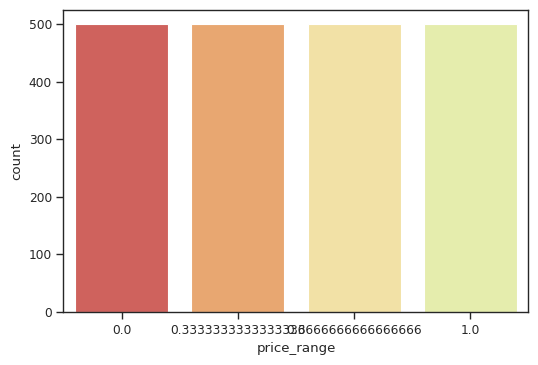

In [172]:
#Count of values for Price range
sns.countplot(x="price_range", data=df)

In [173]:
keys = [i  for i in df.columns]
values = [df[i].nunique() for i in keys]
dt = pd.DataFrame()
dt['features'] = keys
dt['nunique'] = values
dt

,features,nunique
0,battery_power,1094
1,blue,2
2,clock_speed,26
3,dual_sim,2
4,fc,20
5,four_g,2
6,int_memory,63
7,m_dep,10
8,mobile_wt,121
9,n_cores,8


#Correlation

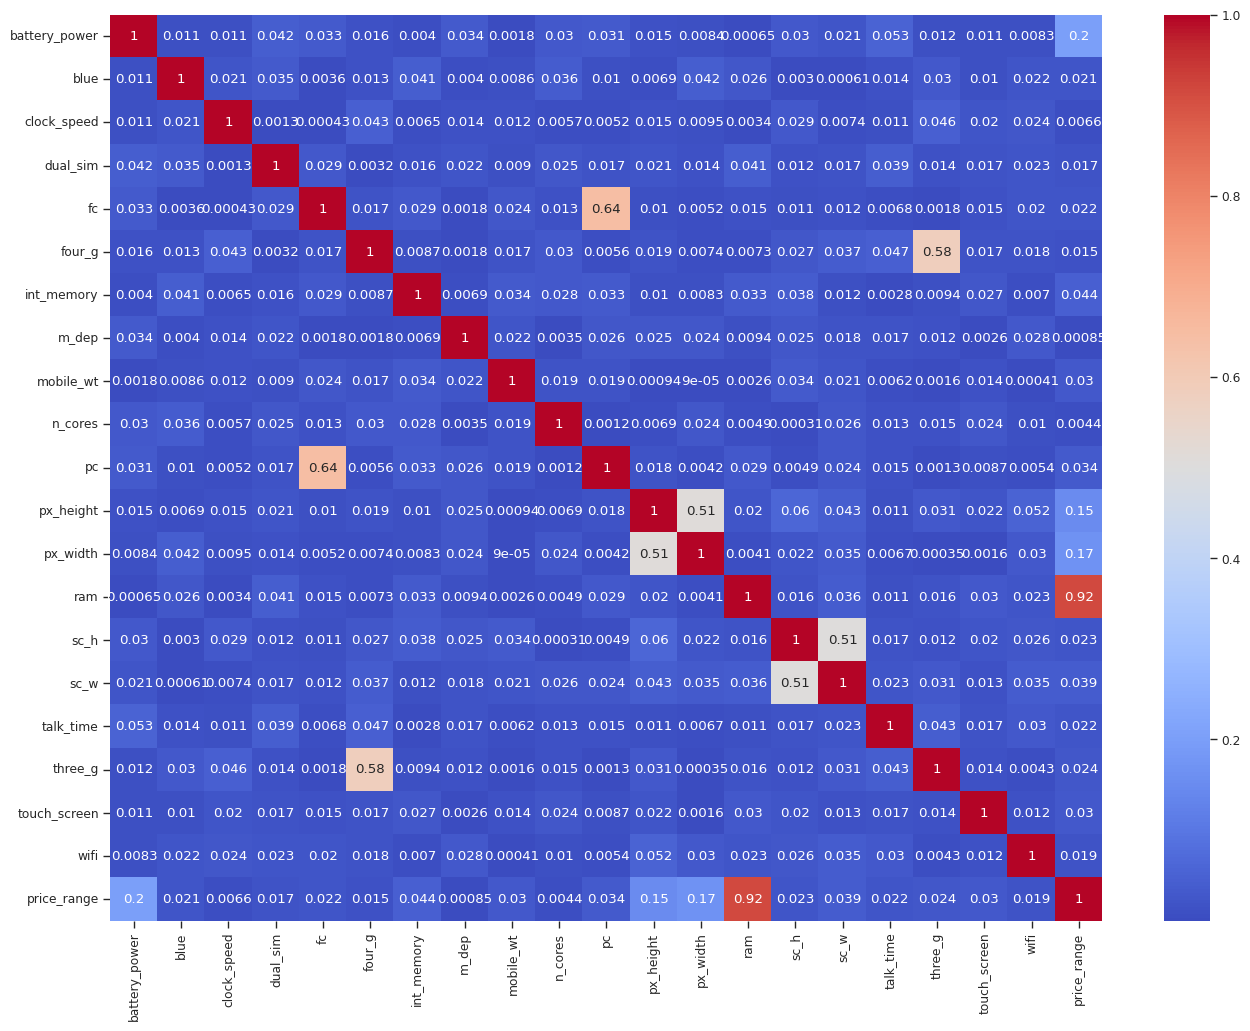

In [174]:
 ## Correlation
plt.figure(figsize=(16,12))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##Distribution of features 

In [175]:
numeric_features = ['battery_power','clock_speed','m_dep','mobile_wt','n_cores','px_height','px_width','ram','fc','int_memory','pc','sc_h','sc_w','talk_time']
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

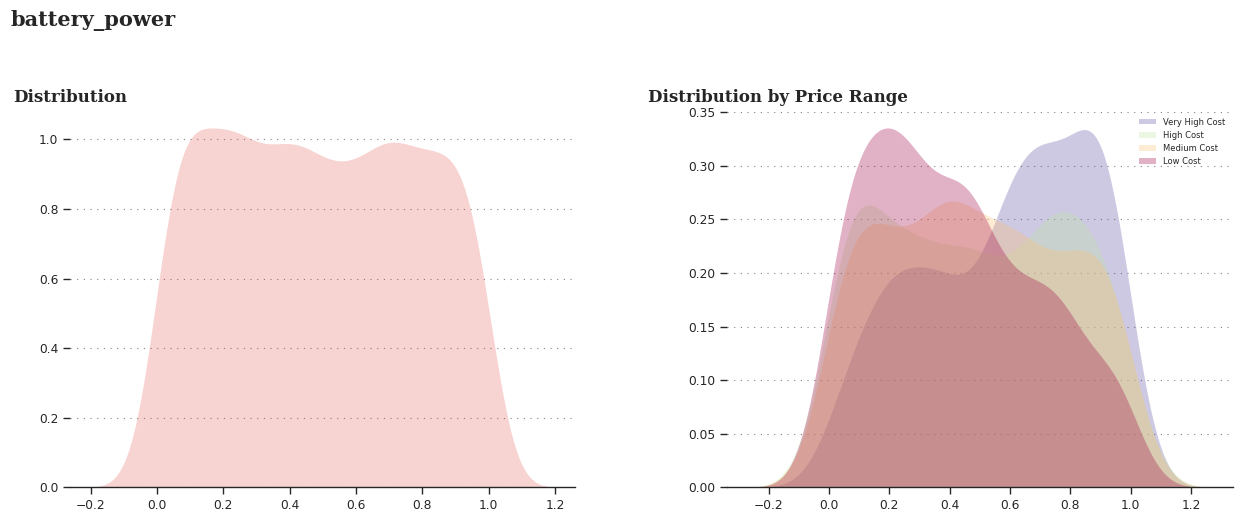

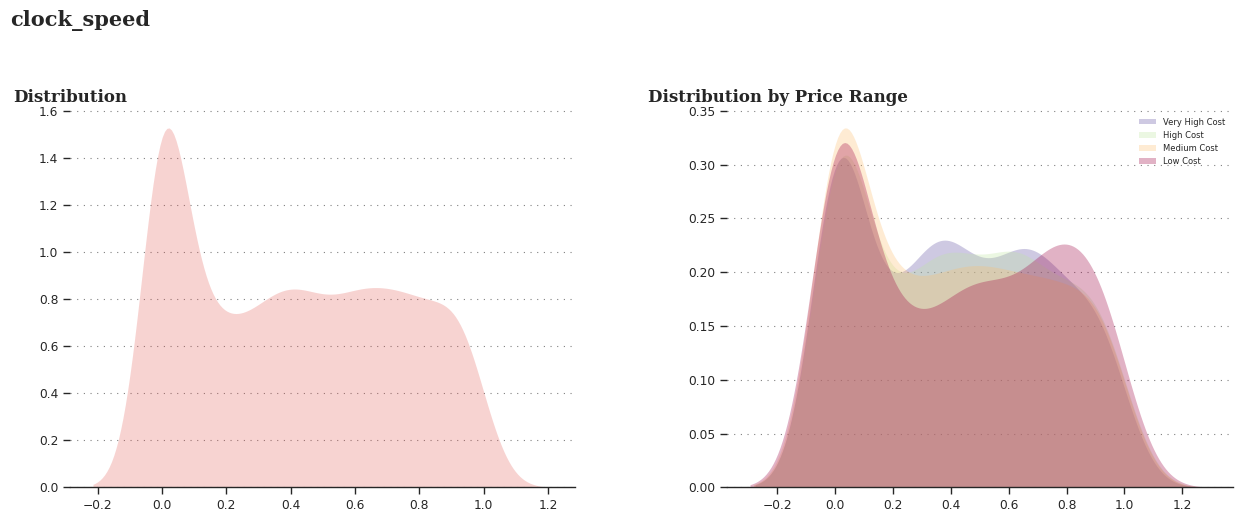

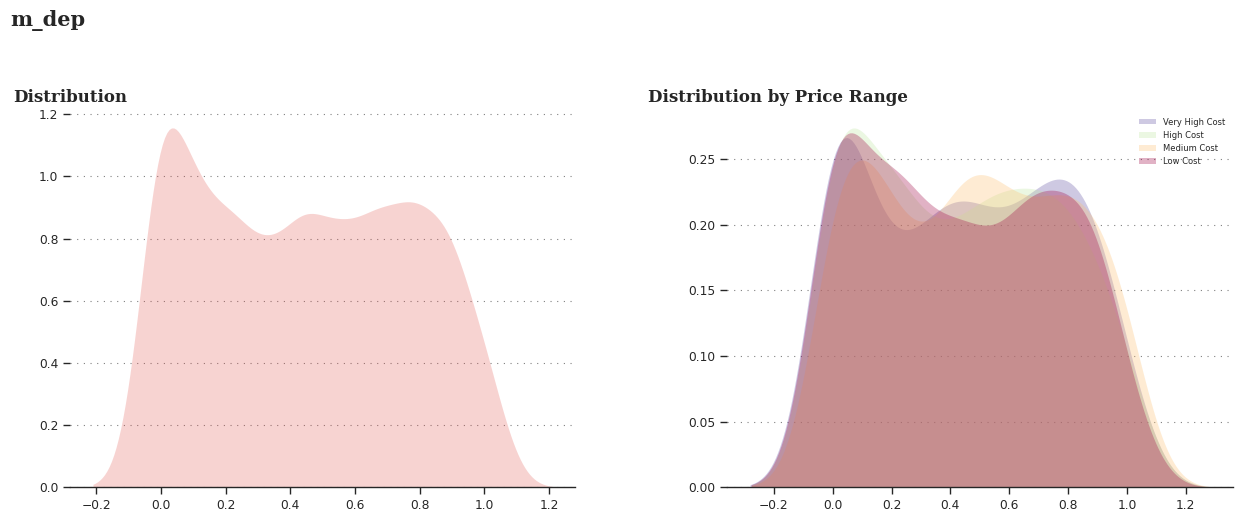

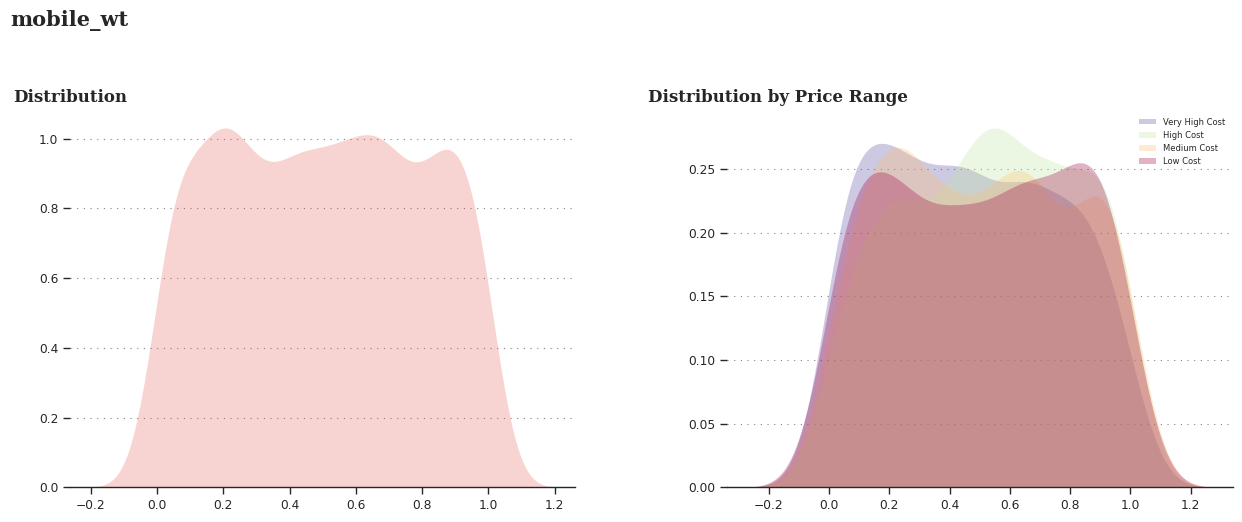

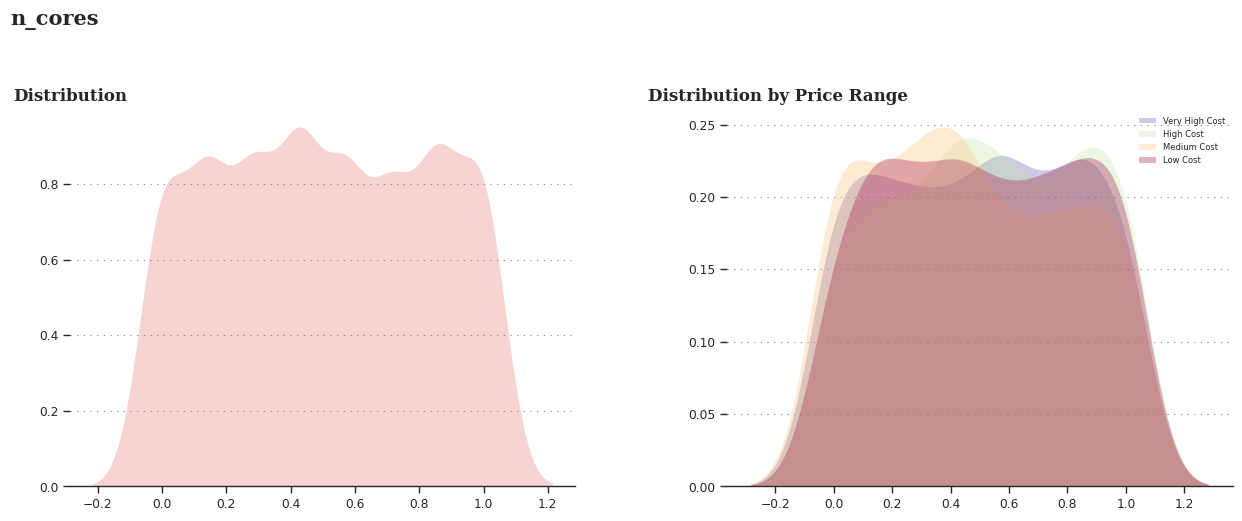

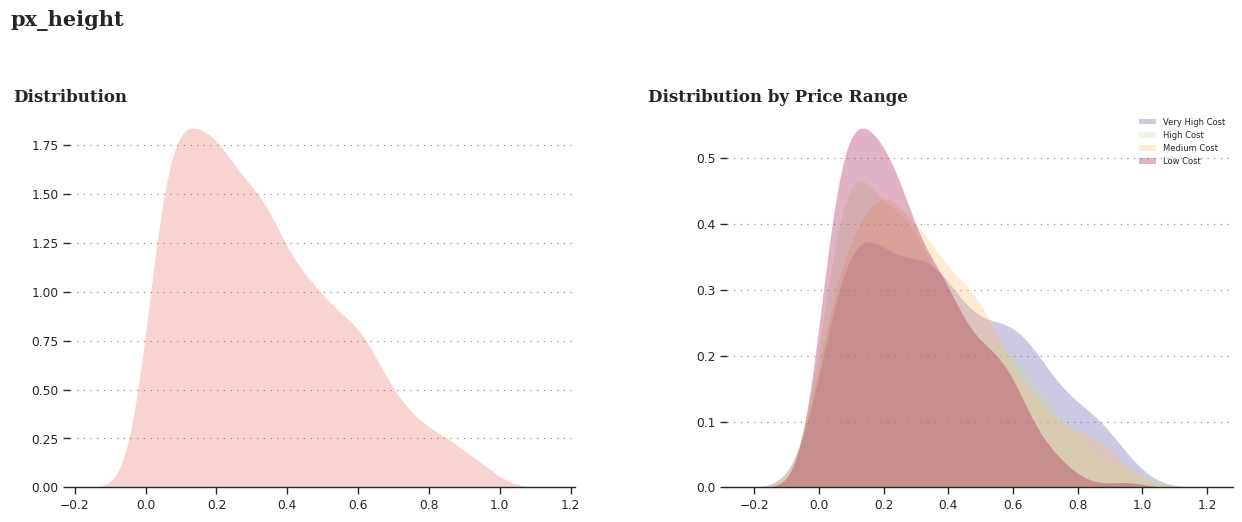

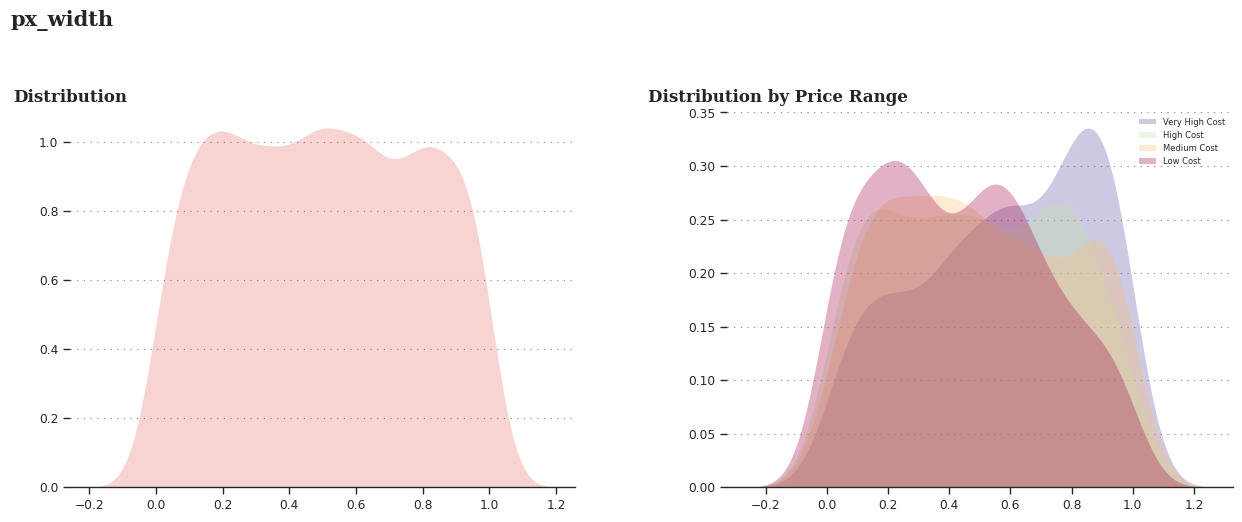

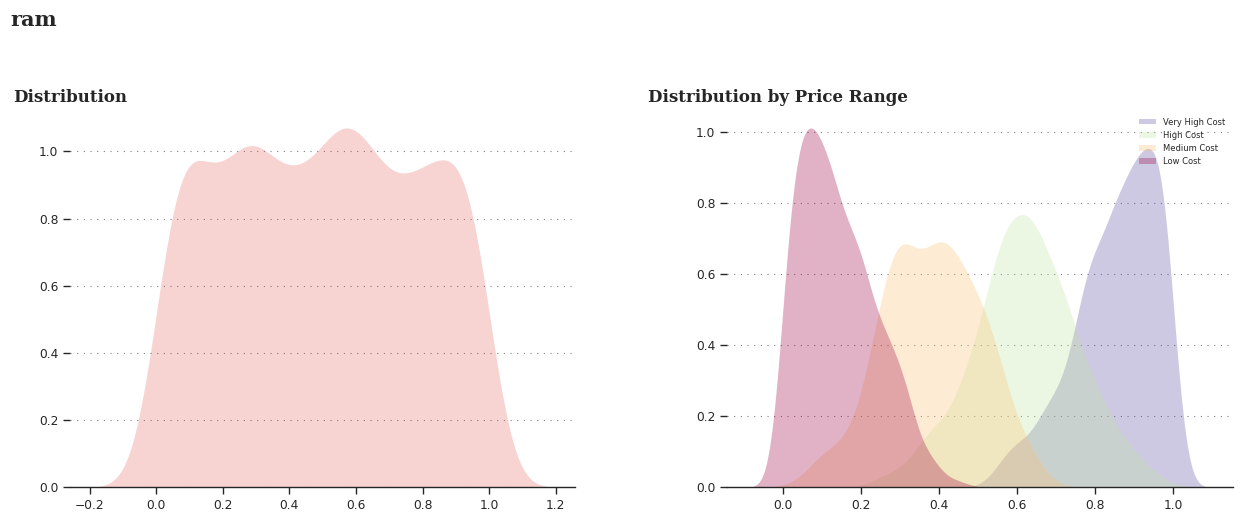

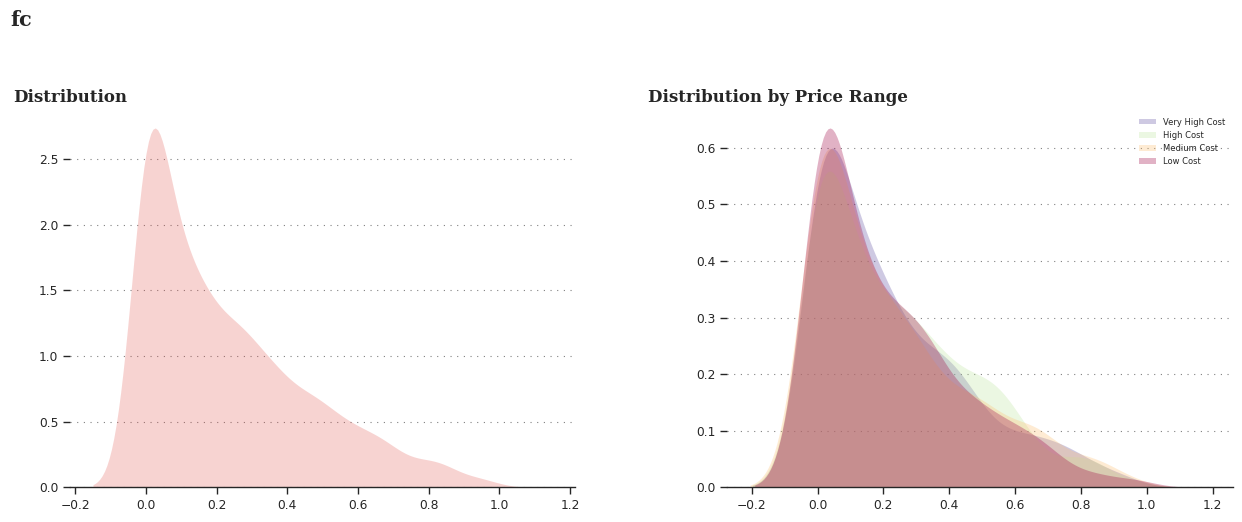

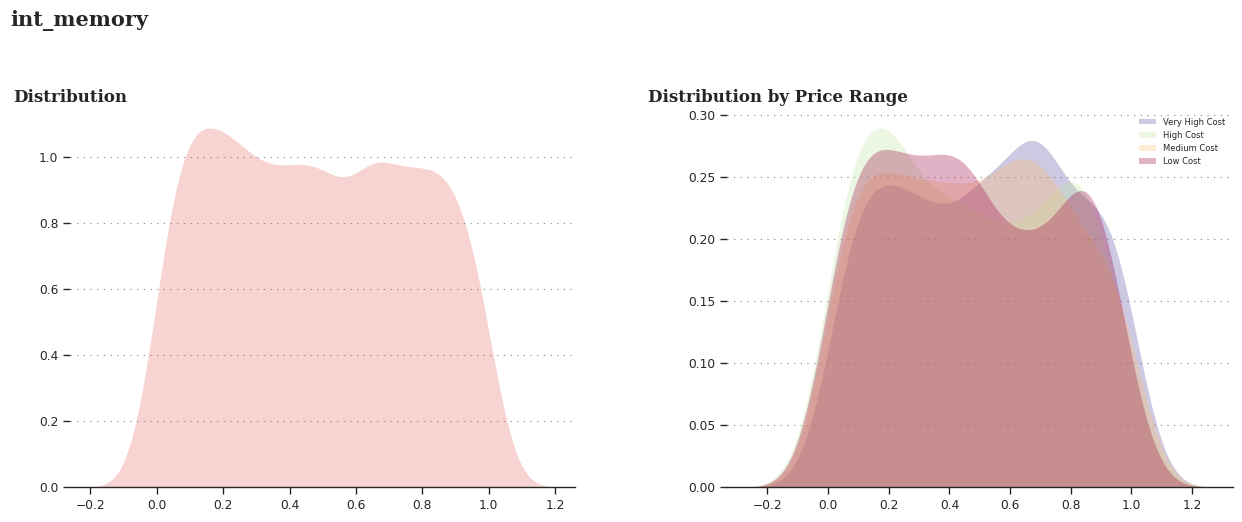

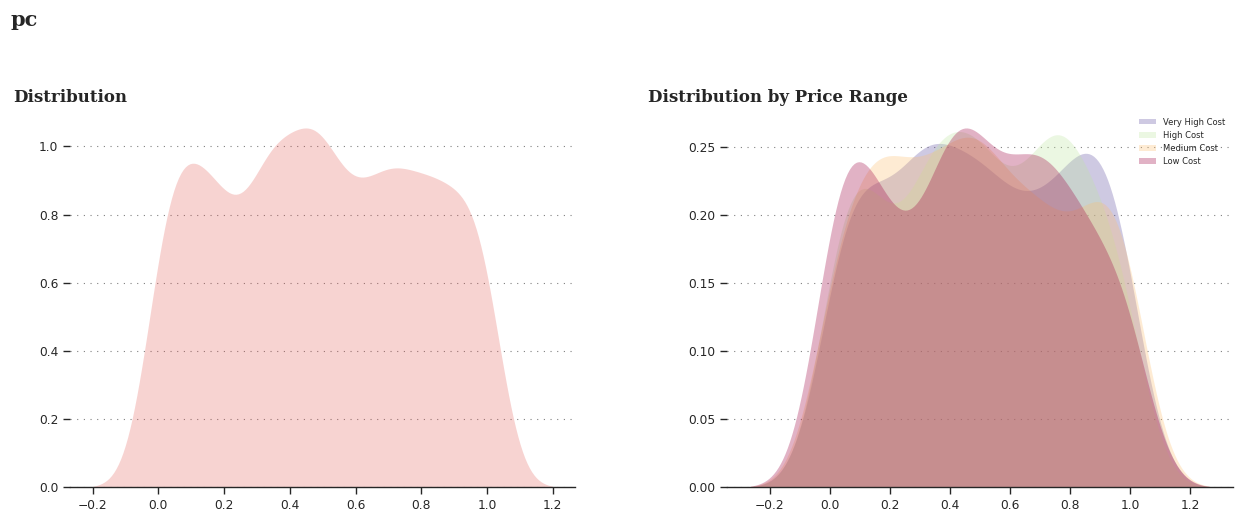

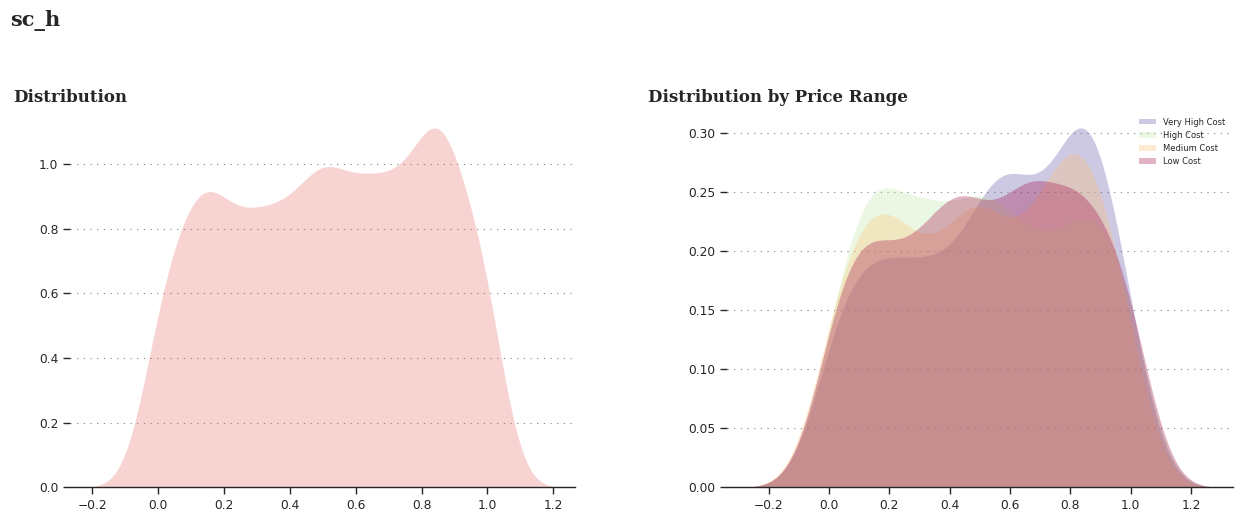

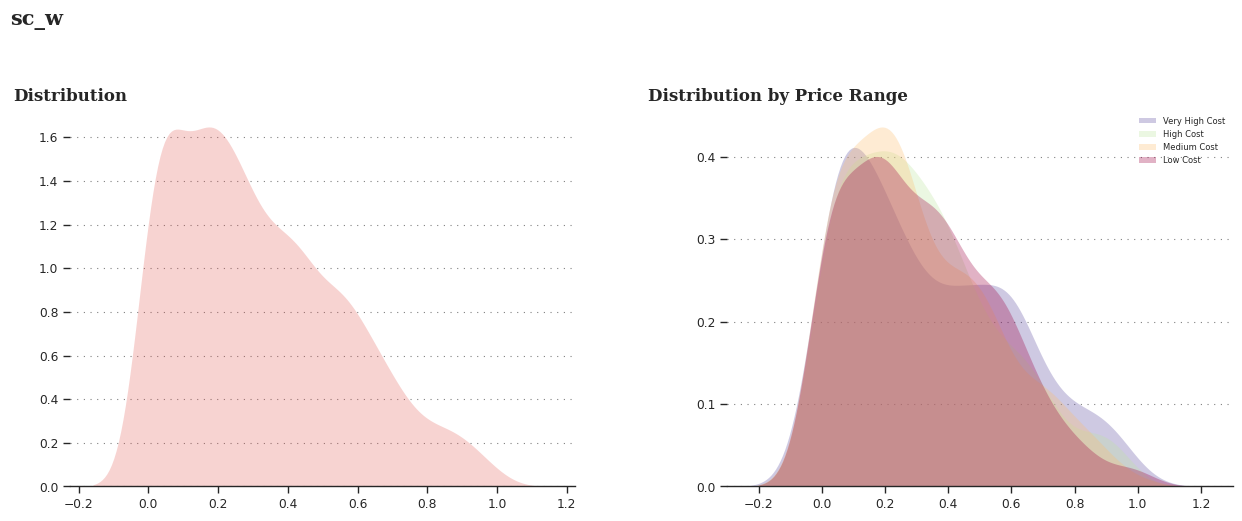

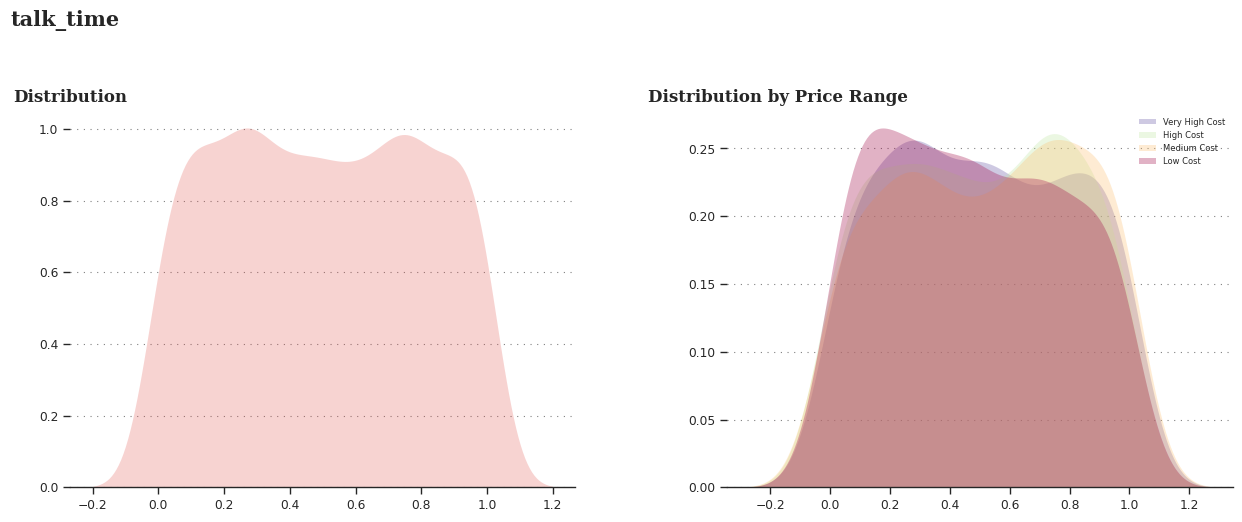

In [176]:
for i in numeric_features:
  sns.set(rc={"figure.dpi":100})
  sns.set_context('paper')
  sns.set_style("ticks")

  fig = plt.figure(figsize=(15,12))
  gs = fig.add_gridspec(2, 2)
  gs.update(wspace=0.3, hspace=0.4)
  fig.text(0.085,0.95,i, fontfamily='serif',fontsize=15, fontweight='bold')
  sns.set_palette('Spectral')

  ax0 = fig.add_subplot(gs[0, 0])
  ax1 = fig.add_subplot(gs[0, 1])
 
#Axis 0 

  ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  sns.kdeplot(x=i,
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )

  ax0.set_xlabel("")
  ax0.set_ylabel("")
  ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1)
  ax0.spines['top'].set_visible(False)
  ax0.spines['right'].set_visible(False)
  ax0.spines['left'].set_visible(False)


  #Axis 1 

  ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  sns.kdeplot(x=i,
           hue='price_range',
           shade=True,
           data=df,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )

  ax1.set_xlabel("")
  ax1.set_ylabel("")
  ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
  ax1.legend(['Very High Cost','High Cost','Medium Cost','Low Cost '],fontsize=6,frameon=False)
  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(False)
  ax1.spines['left'].set_visible(False)

    
 

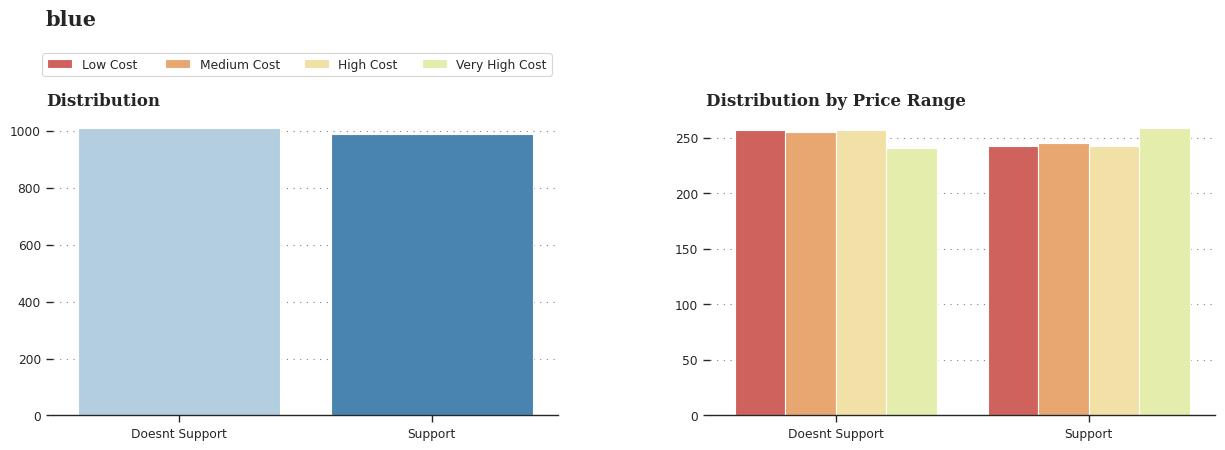

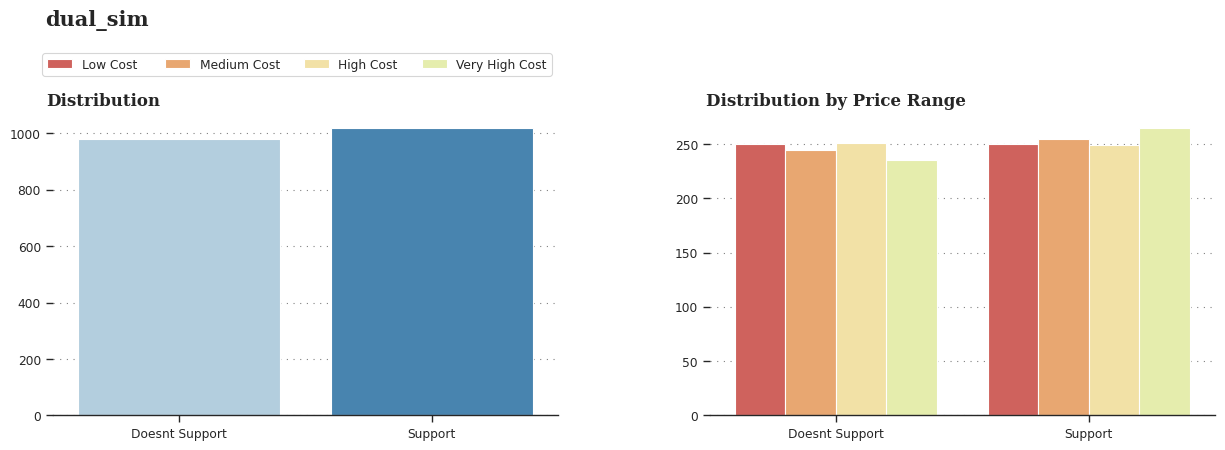

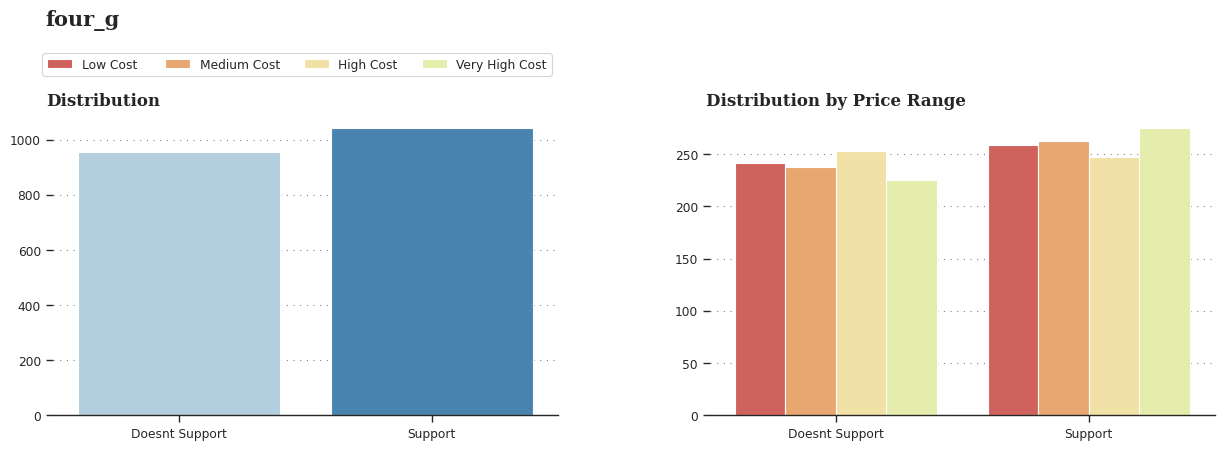

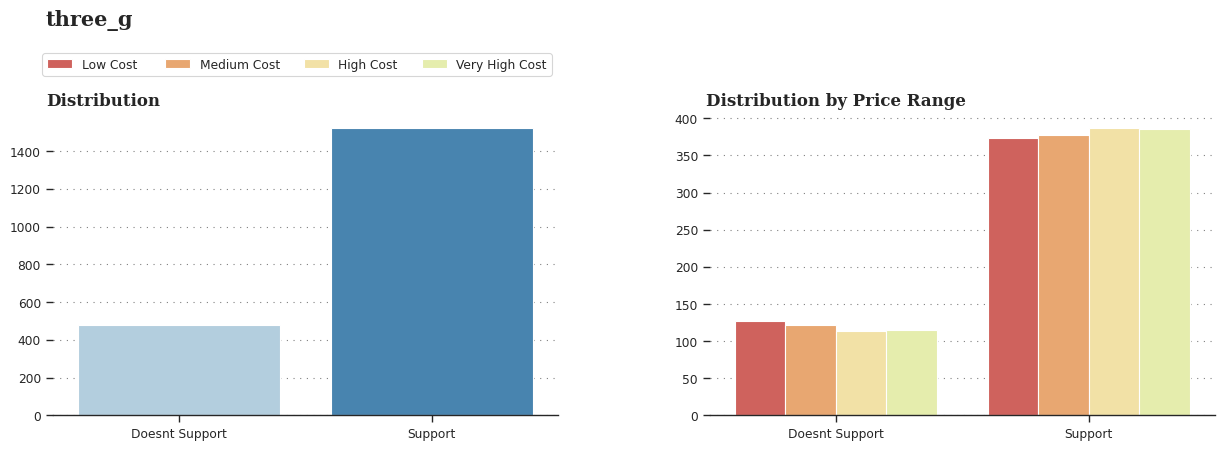

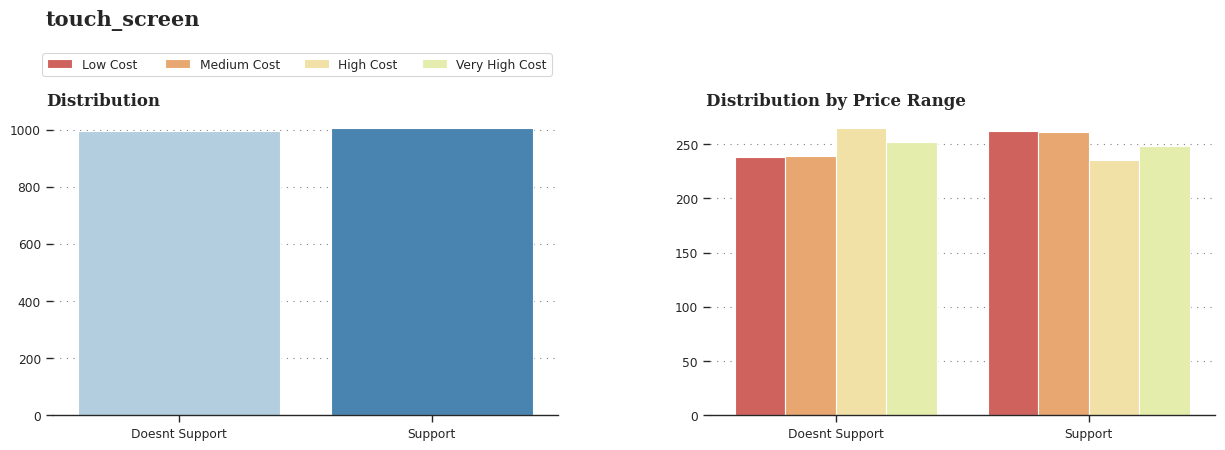

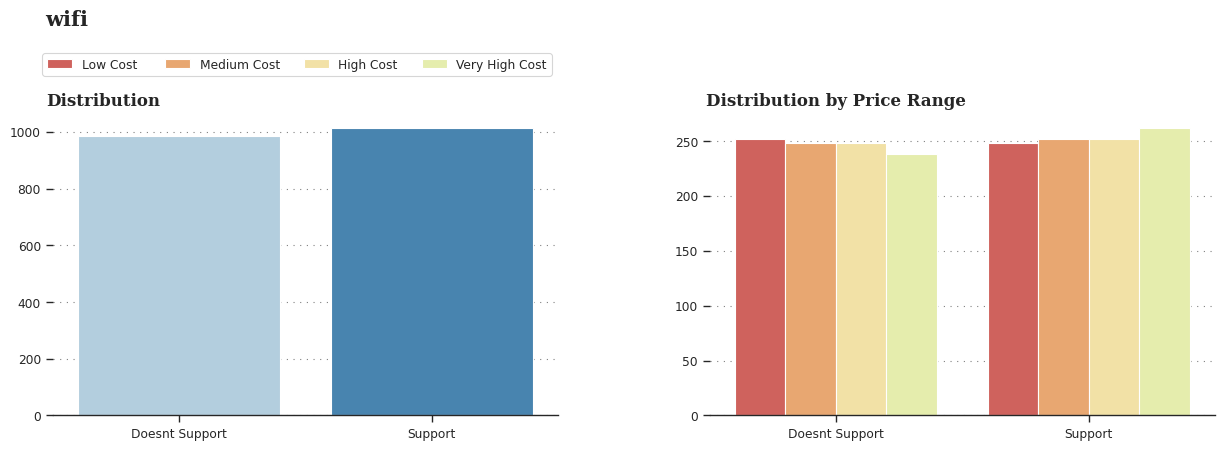

In [177]:
for i in binary_features:
  fig = plt.figure(figsize=(15,4))
  gs = fig.add_gridspec(1, 2)
  gs.update(wspace=0.3, hspace=0)
  fig.text(0.120,1.1,i, fontfamily='serif',fontsize=15, fontweight='bold')
  ax0 = fig.add_subplot(gs[0, 0])
  ax1 = fig.add_subplot(gs[0, 1])


  sns.countplot(x=i,
           data=df,
            palette='Blues',
           ax=ax0)
  ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
  ax0.spines['top'].set_visible(False)
  ax0.spines['right'].set_visible(False)
  ax0.spines['left'].set_visible(False)
  ax0.set_xticklabels(["Doesnt Support","Support"])
  ax0.set_xlabel("")
  ax0.set_ylabel("")   

  sns.countplot(x=i,
             data=df,
             hue='price_range',
             ax=ax1)
  ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(False)
  ax1.spines['left'].set_visible(False)
  ax1.get_legend().remove()
  legend_labels, _= ax1.get_legend_handles_labels()
  ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
  ax1.set_xticklabels(["Doesnt Support","Support"])
  ax1.set_xlabel("")
  ax1.set_ylabel("")

  fig.show()

In [178]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,0.333333
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,0.666667
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,0.666667
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,0.666667
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.000000
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,0.666667
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,1.000000
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.000000


#Jointplot for ram

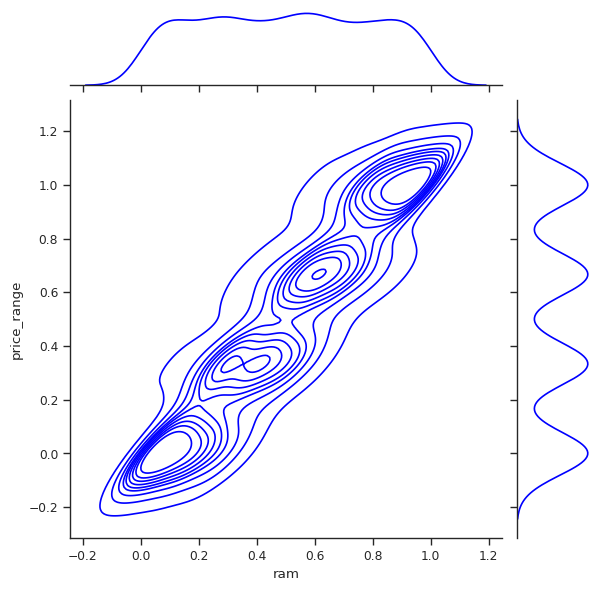

In [179]:
sns.jointplot(x='ram',y='price_range',data=df,color='blue',kind='kde')

#Chi-Square Test for Independence

In [180]:
from scipy.stats import chi2_contingency

In [181]:
catagory=['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
p_value=[]
is_significant_relationship=[]

for i in catagory:
     
    data=pd.crosstab(df[i], df['price_range'], margins=True)
    stat, p, dof, expected = chi2_contingency(data)
    p_value.append(p)
    if p<=0.05:
      is_significant_relationship.append('YES')
    else:
      is_significant_relationship.append('NO')


In [182]:
chi2_table=pd.DataFrame(list(zip(catagory,p_value,is_significant_relationship)),columns=['catagory','p_value','is_significant_relationship'])

In [183]:
chi2_table

,catagory,p_value,is_significant_relationship
0,blue,0.993778,NO
1,dual_sim,0.995712,NO
2,four_g,0.922567,NO
3,n_cores,0.941549,NO
4,three_g,0.994611,NO
5,touch_screen,0.867772,NO
6,wifi,0.999004,NO


#Train Test split

In [234]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['price_range'])],
                                                   df['price_range'],
                                                   test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


#Support Vector Machine Classifier

#Model Training

In [235]:
clf = svm.SVC(kernel='poly')


In [236]:
clf.fit(X_train,y_train)

SVC(kernel='poly')

In [237]:

#check training data accuracy
clf_train_pred = clf.predict(X_train)

clf_train_accuracy = accuracy_score(clf_train_pred, y_train)

In [238]:
print("Accuracy on training data:",clf_train_accuracy )

Accuracy on training data: 0.95625


In [239]:
from sklearn.metrics import classification_report
report_train=classification_report(clf_train_pred, y_train)
print(report_train)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       427
           1       0.93      0.97      0.95       392
           2       0.93      0.95      0.94       393
           3       0.97      0.96      0.96       388

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


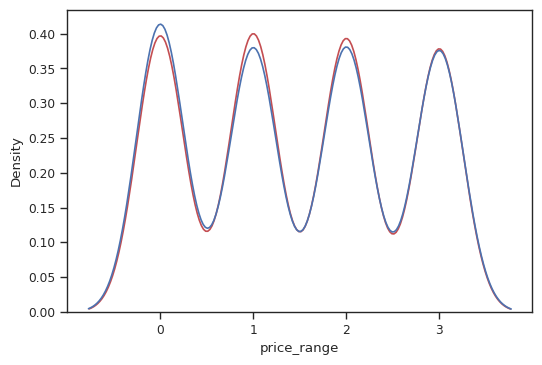

In [240]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(clf_train_pred,hist=False,color="b",ax=ax1)

#Model Testing

In [241]:
#check testing data accuracy
clf_test_pred = clf.predict(X_test)

clf_test_accuracy = accuracy_score(clf_test_pred, y_test)

In [242]:
print("Accuracy on test data:",clf_test_accuracy )

Accuracy on test data: 0.9625


In [243]:
report_test=classification_report(clf_test_pred, y_test)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.96      0.97      0.96        91
           2       0.92      0.96      0.94        95
           3       0.97      0.96      0.97       116

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


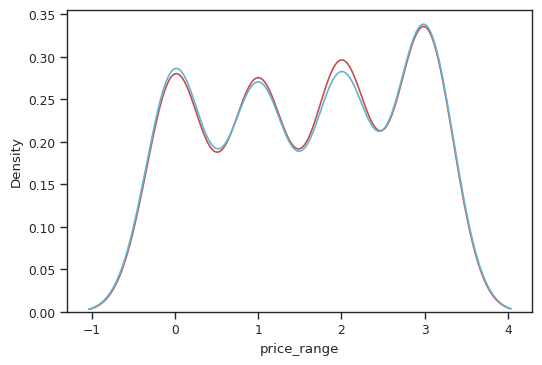

In [244]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(clf_test_pred,hist=False,color="c",ax=ax1)

#Random forest Classifier

In [245]:
from sklearn.model_selection import GridSearchCV

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=42, shuffle=False)


In [247]:
grid_values = {'n_estimators':[75, 80, 85, 90], 'max_depth':[7, 9, 11, 13], "max_leaf_nodes": [35, 40, 45, 50]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'max_leaf_nodes': [35, 40, 45, 50],
                         'n_estimators': [75, 80, 85, 90]},
             scoring='accuracy')

In [248]:
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 50, 'n_estimators': 90}

##Model Training

In [249]:

rf = RandomForestClassifier(max_depth=11,max_leaf_nodes= 50 ,random_state=0,n_estimators= 90)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=50, n_estimators=90,
                       random_state=0)

In [250]:
#check training data accuracy
rf_train_pred = rf.predict(X_train)

rf_train_accuracy = accuracy_score(rf_train_pred, y_train)

In [251]:
print("Accuracy on test data:",rf_train_accuracy )

Accuracy on test data: 0.953125


In [252]:
train_report=classification_report(rf_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       416
           1       0.90      0.93      0.92       397
           2       0.93      0.93      0.93       403
           3       0.99      0.99      0.99       384

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


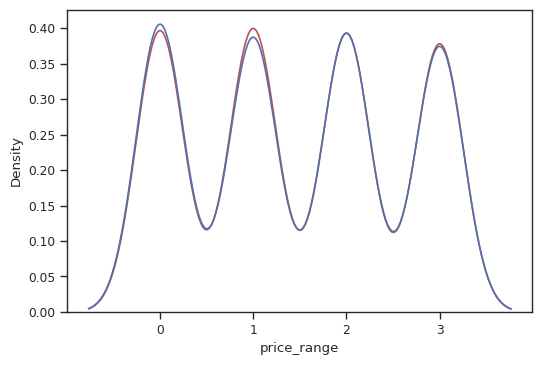

In [253]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(rf_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [254]:
#check testing data accuracy
rf_test_pred = rf.predict(X_test)

rf_test_accuracy = accuracy_score(rf_test_pred, y_test)

In [255]:
print("Accuracy on test data:",rf_test_accuracy )

Accuracy on test data: 0.83


In [256]:
test_report=classification_report(rf_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        98
           1       0.78      0.74      0.76        97
           2       0.63      0.74      0.68        84
           3       0.93      0.88      0.90       121

    accuracy                           0.83       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.84      0.83      0.83       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


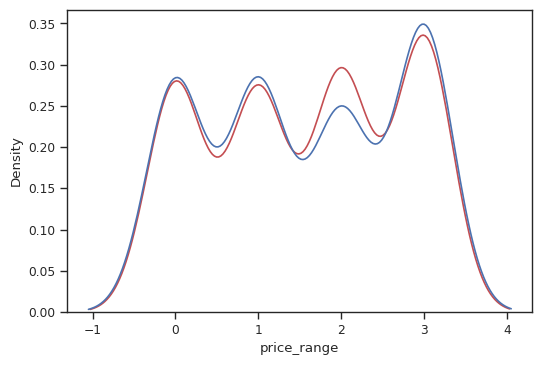

In [257]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(rf_test_pred,hist=False,color="b",ax=ax1)

##Importance of features 

In [258]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


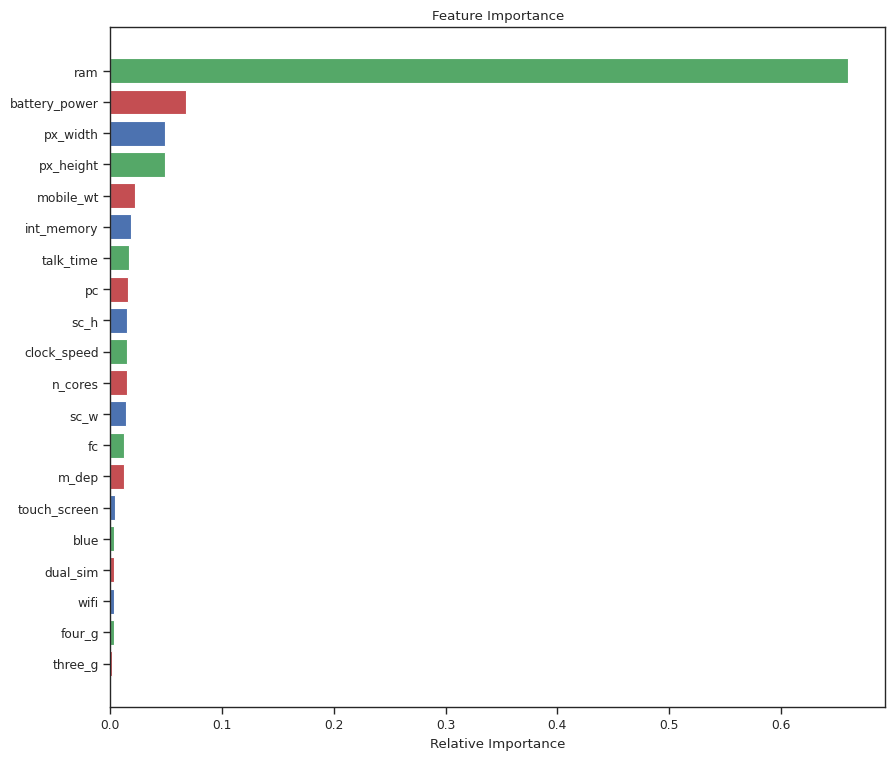

In [259]:
fig = plt.figure(figsize=(10,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='rgb', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##Random forest model with ram,battery_power,px_height,px_width,int_memory features

In [260]:
imp_fea_df=df[['ram','battery_power','px_height','px_width']]
imp_fea_df

,ram,battery_power,px_height,px_width
0,2549,842,20,756
1,2631,1021,905,1988
2,2603,563,1263,1716
3,2769,615,1216,1786
4,1411,1821,1208,1212
...,...,...,...,...
1995,668,794,1222,1890
1996,2032,1965,915,1965
1997,3057,1911,868,1632
1998,869,1512,336,670


In [261]:
x_imp= imp_fea_df
Y_imp=df['price_range']

In [262]:
#applying minmaxscaler
scaler=MinMaxScaler()
X=scaler.fit_transform(x_imp)

In [263]:
#train test split
from sklearn.model_selection import train_test_split 
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split( x_imp, Y_imp , test_size = 0.2, random_state = 0) 

##Training Model

In [264]:
rf = RandomForestClassifier(max_depth=11,max_leaf_nodes= 50 ,random_state=0,n_estimators= 90)
rf.fit(X_imp_train,y_imp_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=50, n_estimators=90,
                       random_state=0)

In [265]:
#check training data accuracy
rf_train_imp_pred = rf.predict(X_imp_train)

rf_train_imp_accuracy = accuracy_score(rf_train_imp_pred, y_imp_train)

In [266]:
print("Accuracy on test data:",rf_train_imp_accuracy )

Accuracy on test data: 0.965625


In [267]:
train_report=classification_report(rf_train_imp_pred, y_imp_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       405
           1       0.96      0.96      0.96       408
           2       0.96      0.95      0.95       404
           3       0.97      0.98      0.98       383

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



##Testing Model

In [268]:
#check testing data accuracy
rf_test_imp_pred = rf.predict(X_imp_test)

rf_test_imp_accuracy = accuracy_score(rf_test_imp_pred, y_imp_test)

In [269]:
print("Accuracy on test data:",rf_test_imp_accuracy )

Accuracy on test data: 0.9


In [270]:
test_report=classification_report(rf_test_imp_pred, y_imp_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.88      0.89      0.89        91
           2       0.82      0.83      0.82        98
           3       0.92      0.91      0.92       115

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



#Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

##Model Training

In [272]:
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [273]:
#check training data accuracy
reg_train_pred = reg.predict(X_train)

reg_train_accuracy = accuracy_score(reg_train_pred, y_train)

In [274]:
print("Accuracy on test data:",reg_train_accuracy )

Accuracy on test data: 0.635


In [275]:
train_report=classification_report(reg_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.78      0.82      0.79       385
           1       0.55      0.56      0.56       400
           2       0.47      0.50      0.49       379
           3       0.74      0.66      0.70       436

    accuracy                           0.64      1600
   macro avg       0.64      0.63      0.63      1600
weighted avg       0.64      0.64      0.64      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


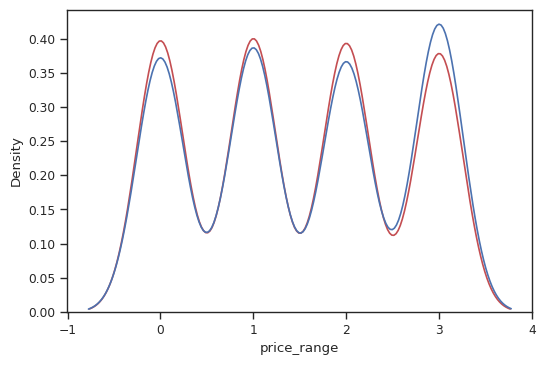

In [276]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(reg_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [277]:
#check testing data accuracy
reg_test_pred = reg.predict(X_test)

reg_test_accuracy = accuracy_score(reg_test_pred, y_test)

In [278]:
print("Accuracy on test data:",reg_test_accuracy )

Accuracy on test data: 0.645


In [279]:
test_report=classification_report(reg_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.58      0.56      0.57        94
           2       0.43      0.44      0.44        97
           3       0.68      0.72      0.70       109

    accuracy                           0.65       400
   macro avg       0.64      0.64      0.64       400
weighted avg       0.65      0.65      0.65       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


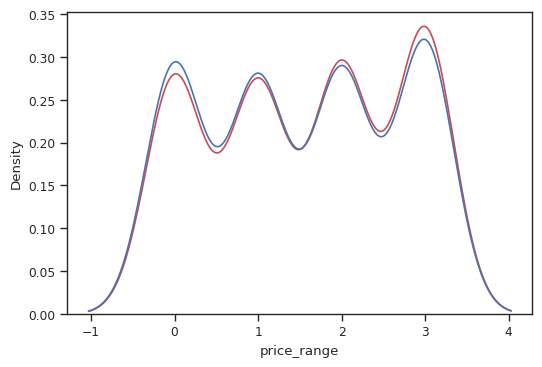

In [280]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(reg_test_pred,hist=False,color="b",ax=ax1)

#Xgboost classifier

In [281]:
from xgboost import XGBClassifier
Xgbclf=XGBClassifier()


In [282]:
param={
    'learning_rate':[0.01, 0.025, 0.05, 0.75, 0.10],
    'max_depth':[3,4,5],
    'n_estimators':[25,50,75,100,150,200],
}
grid_search = GridSearchCV(Xgbclf, param,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.75, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [25, 50, 75, 100, 150, 200]})

In [283]:
grid_search.best_params_

{'learning_rate': 0.75, 'max_depth': 3, 'n_estimators': 75}

In [284]:
Xgbclf=XGBClassifier(learning_rate= 0.75,
 max_depth = 3,
 n_estimators = 100)
Xgbclf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.75, objective='multi:softprob')

##Model Training

In [285]:
#check training data accuracy
xg_train_pred = Xgbclf.predict(X_train)

xg_train_accuracy = accuracy_score(xg_train_pred, y_train)

In [286]:
print("Accuracy on test data:",xg_train_accuracy )

Accuracy on test data: 1.0


In [287]:
train_report=classification_report(xg_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       386

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


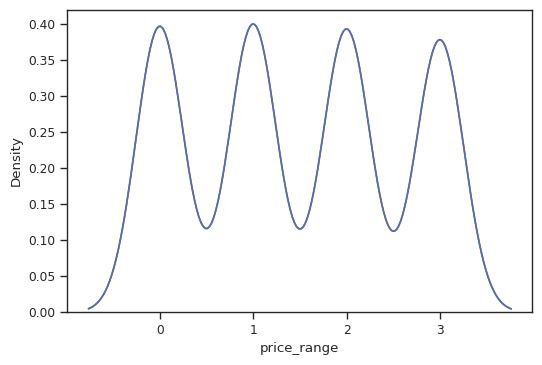

In [288]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(xg_train_pred,hist=False,color="b",ax=ax1)

##Model Testing

In [289]:
#check testing data accuracy
xg_test_pred = Xgbclf.predict(X_test)

xg_test_accuracy = accuracy_score(xg_test_pred, y_test)

In [290]:
print("Accuracy on test data:",xg_test_accuracy )

Accuracy on test data: 0.9375


In [291]:
test_report=classification_report(xg_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        96
           1       0.93      0.93      0.93        92
           2       0.87      0.91      0.89        95
           3       0.96      0.93      0.94       117

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


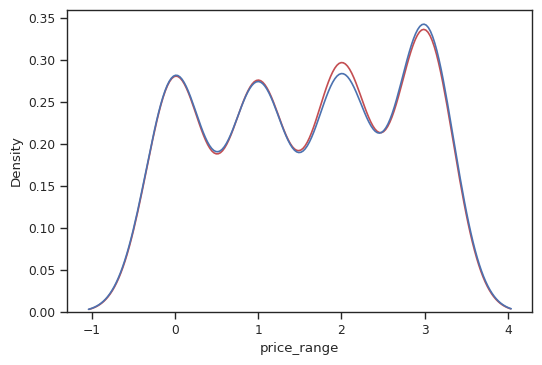

In [292]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(xg_test_pred,hist=False,color="b",ax=ax1)

#Conclusion:-

1.we achieve almost same accuracy using all features and using some importatnt features hence we can say that The main features that drive the mobile bphone price is ram,battery_power,pixel dimensions,int_memory. 

3.We achieve 96% of accuracy on test data using SVM.it was concluded that the Logistic regression model was the best among all.